In [18]:
# Load data locally with structure:
# directory
#  - class1
#    - image1
#    - image2
#    - ...
#  - class2
#    - image1
#    - image2
#    - ...
import os
import pandas as pd

# Load data
data_dir = 'sample'
classes = os.listdir(data_dir)
image_filenames = []
y = []
for c in classes:
    for f in os.listdir(os.path.join(data_dir, c)):
        image_filenames.append(os.path.join(data_dir, c, f))
        y.append(c)

# Load images
from PIL import Image
import numpy as np

X = []
for f in image_filenames:
    im = Image.open(f)
    
    # Resize to 64x64
    im = im.resize((64, 64))

    # Convert to numpy array
    some_x = np.array(im)

    # Reshape to one row
    some_x = some_x.reshape(-1)
    X.append(some_x)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((335, 12288), (335,))

parcel
(64, 64, 3)


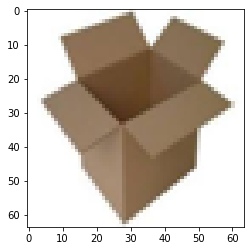

In [20]:
# Look at some images
import matplotlib.pyplot as plt

some_image = X[8].reshape(64, 64, 3)
print(y[8])
print(some_image.shape)
plt.imshow(some_image)


In [21]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=918379)

## SGD Stochastic Gradient Descent Classifier

In [22]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=101208)
sgd_clf.fit(x_train, y_train)


SGDClassifier(random_state=101208)

Predicted:  ['parcel']
Truth:  parcel


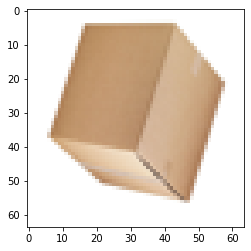

In [23]:
# Predict some images
some_image = x_train[8].reshape(64, 64, 3)
print("Predicted: ", sgd_clf.predict([x_train[8]]))
print("Truth: ", y_train[8])
plt.imshow(some_image)


In [25]:
# Evaluate with cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.65555556, 0.6741573 , 0.79775281])

In [26]:
# Evaluate model on test set
from sklearn.metrics import accuracy_score

y_pred = sgd_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8656716417910447

## Random Forest Classifier

In [27]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=101208)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=101208)

In [28]:
# Evaluate on test set
y_pred = rf_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9402985074626866